# Heart Disease Prediction


# Will a patient have a 10 year risk of developing a cardio vascular diseases?

# Importing The Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading The Data

In [ ]:
path=r"framingham.csv
df=pd.read_csv(path)
df.shape

FileNotFoundError: ignored

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Table of contents
1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Feature Selection](#paragraph2)
4. [Feature Scaling](#paragraph3)
5. [Test - Train Split](#paragraph4)
6. [Resampling](#paragraph5)
7. [Model Pipeline](#paragraph6)
8. [Modelling & Evaluation](#paragraph7)
9. [Apply model](#paragraph8)


**Attributes:**

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* Tot Chol: total cholesterol level (Continuous) 
* Sys BP: systolic blood pressure (Continuous) 
* Dia BP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


In [ ]:
# importing libraries

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

# Missing Value Treatment

# Null Values

In [ ]:
# checking for missing values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#after dropping null values
df.shape

(3658, 16)

In [ ]:
# check for dupicates
df_duplicates=df.duplicated()
df_duplicates.sum()

0

# Handling Outliers

Text(0.5, 1.0, 'Box plot-cigsPerDay')

Text(0.5, 0, 'cigsPerDay')

Text(0.5, 1.0, 'Box plot-totChol')

Text(0.5, 0, 'totChol')

Text(0.5, 1.0, 'Box plot-sysBP')

Text(0.5, 0, 'sysBP')

Text(0.5, 1.0, 'Box plot-diaBP')

Text(0.5, 0, 'diaBP')

Text(0.5, 1.0, 'Box plot-BMI')

Text(0.5, 0, 'BMI')

Text(0.5, 1.0, 'Box plot-heartRate')

Text(0.5, 0, 'heartRate')

Text(0.5, 1.0, 'Box plot-glucose')

Text(0.5, 0, 'glucose')

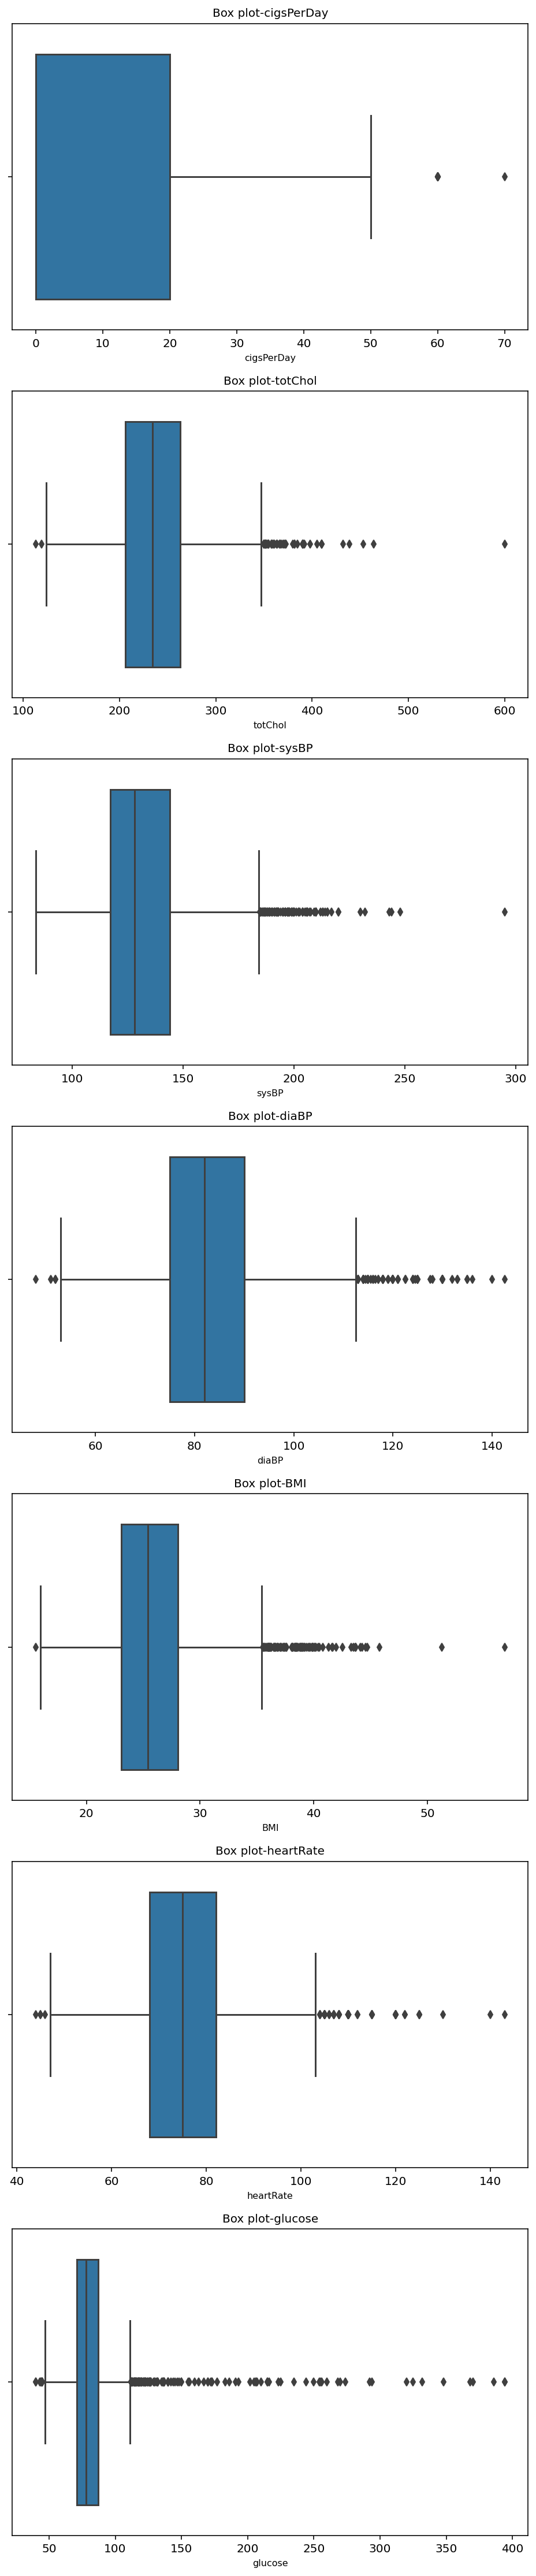

In [ ]:
#detecting outliers using boxplot 
col_names=['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
fig,ax=plt.subplots(len(col_names),figsize=(8,40))
for i,col_val in enumerate(col_names):
    sns.boxplot(x=df[col_val],ax=ax[i])
    ax[i].set_title('Box plot-{}'.format(col_val),fontsize=10)
    ax[i].set_xlabel(col_val,fontsize=8)
plt.show()

In [ ]:
#Using IQR approach to remove outliers
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
print(IQR)

male                 1.00
age                 23.00
education            3.00
currentSmoker        1.00
cigsPerDay          25.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         1.00
diabetes             0.00
totChol            110.00
sysBP               53.00
diaBP               29.00
BMI                  9.55
heartRate           31.00
glucose             33.00
TenYearCHD           1.00
dtype: float64


In [ ]:
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

       male    age  education  ...  heartRate  glucose  TenYearCHD
0     False  False      False  ...      False    False       False
1     False  False      False  ...      False    False       False
2     False  False      False  ...      False    False       False
3     False  False      False  ...      False    False       False
4     False  False      False  ...      False    False       False
...     ...    ...        ...  ...        ...      ...         ...
4233  False  False      False  ...      False    False       False
4234  False  False      False  ...      False    False       False
4237  False  False      False  ...      False    False       False
4238  False  False      False  ...      False    False       False
4239  False  False      False  ...      False    False       False

[3658 rows x 16 columns]


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(3432, 16)

# EDA

Text(0.5, 1.0, 'TenYearCHD Distribution According to Gender')

Text(0, 0.5, 'Number Of Patients')

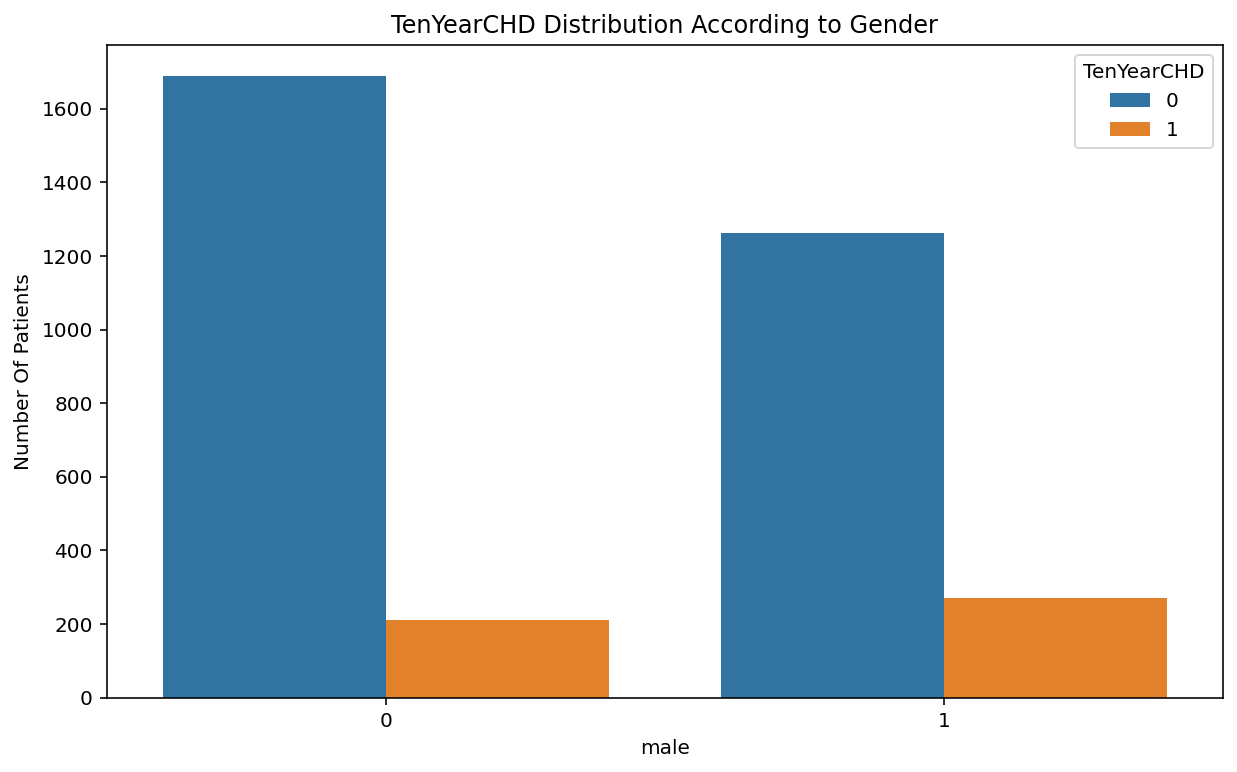

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='male',hue='TenYearCHD',
             data = df, ax=ax)
plt.title('TenYearCHD Distribution According to Gender')
plt.ylabel('Number Of Patients')
plt.show()

**0** - Represents Male, whereas **1** - Represents Female<br>
It can be observed that for both the gender, **Majority** of the patients are not at risk for occurence of CHD in Ten Years. In comparison to Males, *Females are at Higher Risk* for CHD in 10 years.

Text(0.5, 1.0, 'Patient Age Distribution')

Text(0.5, 0, 'Patient Age')

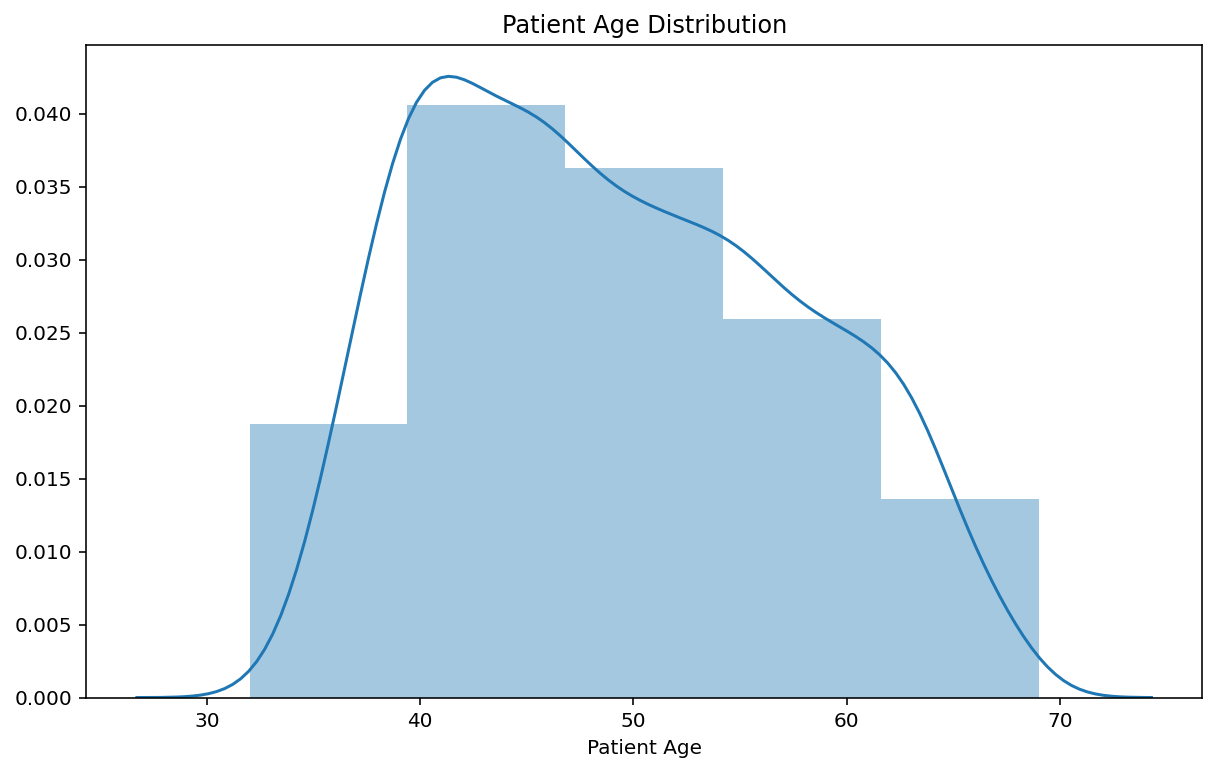

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.distplot(df['age'], hist=True, bins=5, ax=ax)
plt.title('Patient Age Distribution')
plt.xlabel('Patient Age')
plt.show()

Text(0.5, 1.0, 'Patient Age Distribution In Relation with CHD Occurence')

Text(0.5, 0, 'Patient Age')

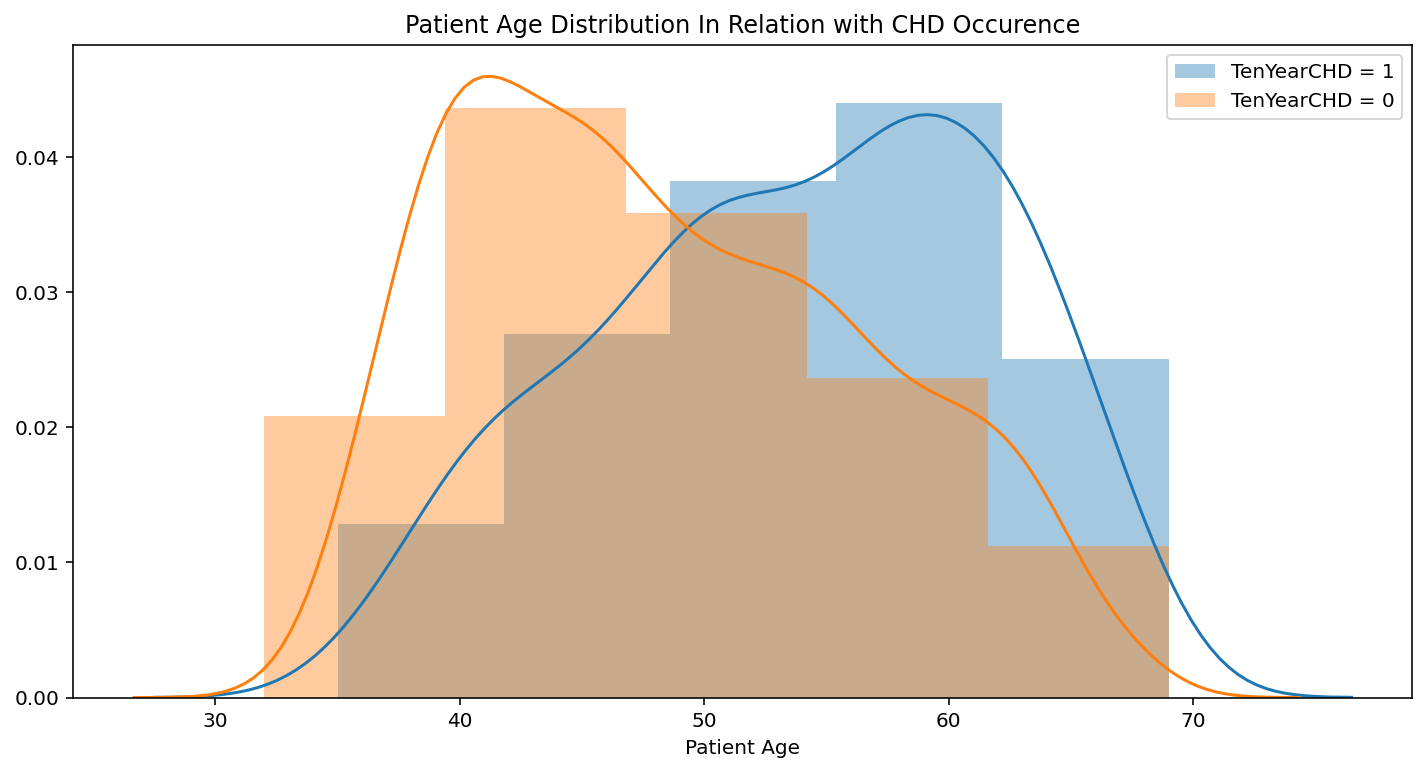

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.distplot(df[df['TenYearCHD'] == 1]['age'], hist=True, bins=5, ax=ax, label='TenYearCHD = 1')
sns.distplot(df[df['TenYearCHD'] == 0]['age'], hist=True, bins=5, ax=ax, label='TenYearCHD = 0')
plt.title('Patient Age Distribution In Relation with CHD Occurence')
plt.xlabel('Patient Age')
plt.legend()
plt.show()

It can be observed that, Patients with **Age Between 40-50** have *Lower Risk of CHD in Ten Years*, whereas Patients with **Age Between 55-62** have *Higher Risk of CHD in Ten Years*.

Text(0.5, 1.0, 'Relationship Between Systolic and Diastolic Blood Pressure')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

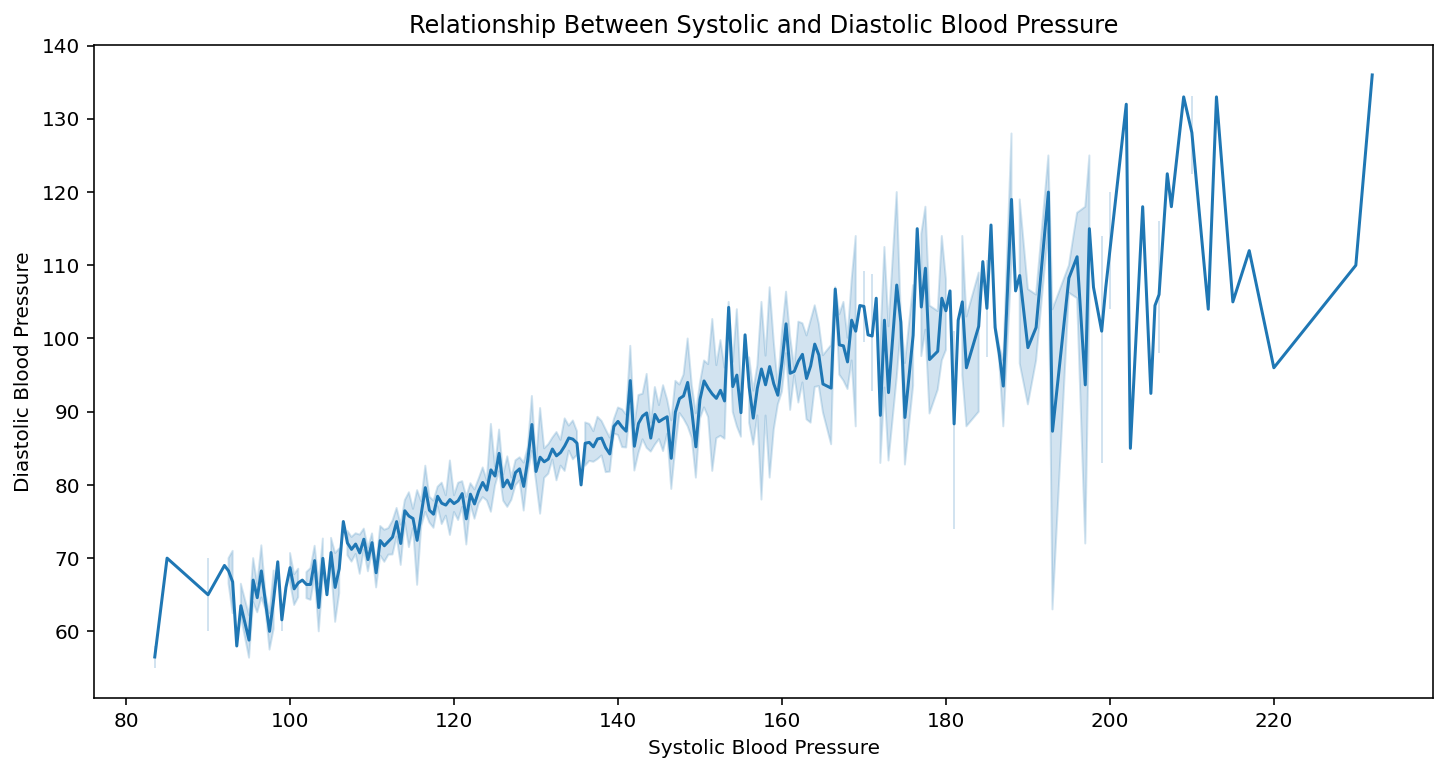

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(x='sysBP', y='diaBP',
               data=df, ax=ax)
plt.title('Relationship Between Systolic and Diastolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

It can be observed that there is a **Postive Correlation** between *Systlic and Diastolic Blood Pressure*. This means, that increase in *Systolic Blood Pressure* leads to increase in *Diastolic Blood Pressure*.

Text(0.5, 1.0, 'Effect of BP On Occurence of CHD')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

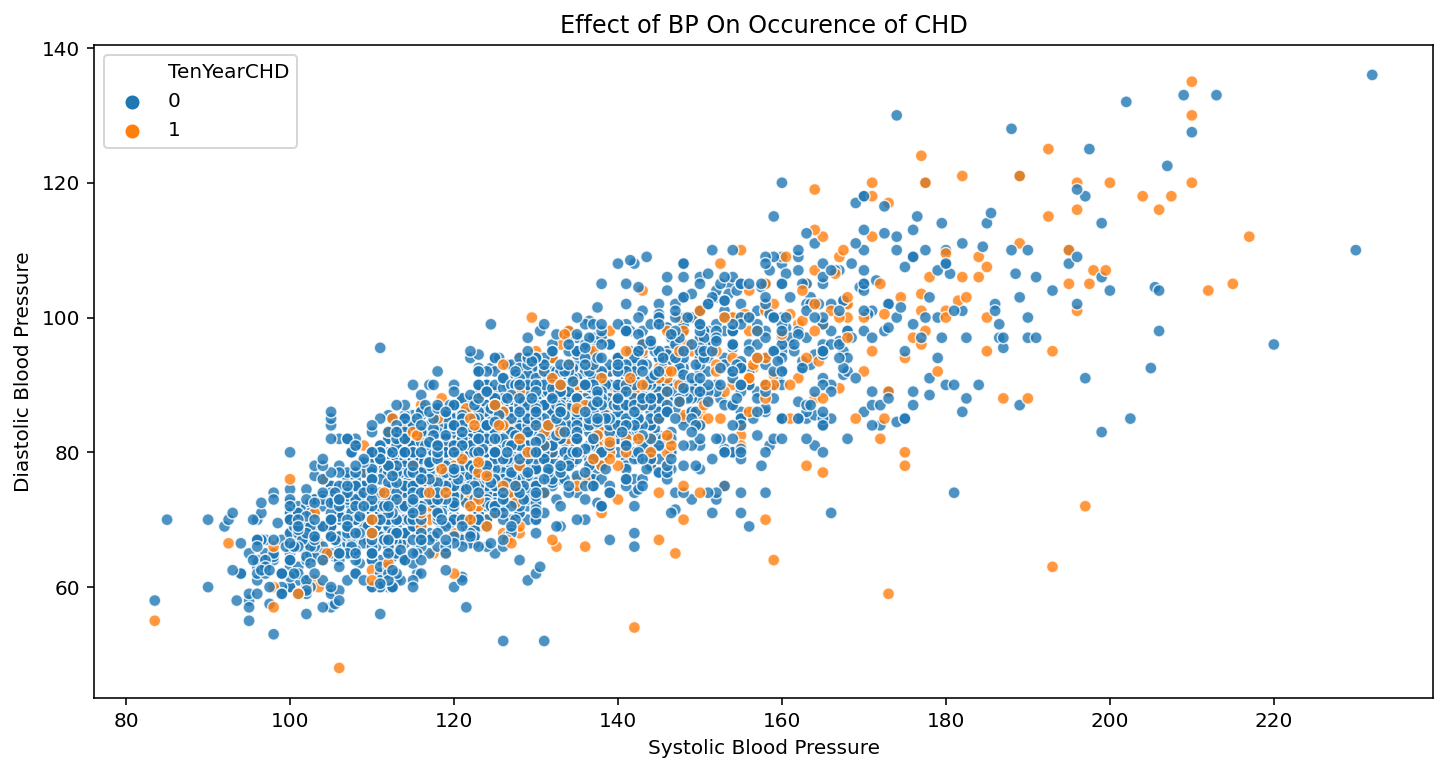

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='sysBP', y='diaBP', hue='TenYearCHD',
               data=df, alpha=0.8, ax=ax)
plt.title('Effect of BP On Occurence of CHD')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

No relation can be established between **BP Level and Occurence of CHD**. There are no clusters present indicating that rise in BP can lead to occurence of CHD.

Text(0.5, 1.0, 'Effect of BP On Occurence of CHD')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

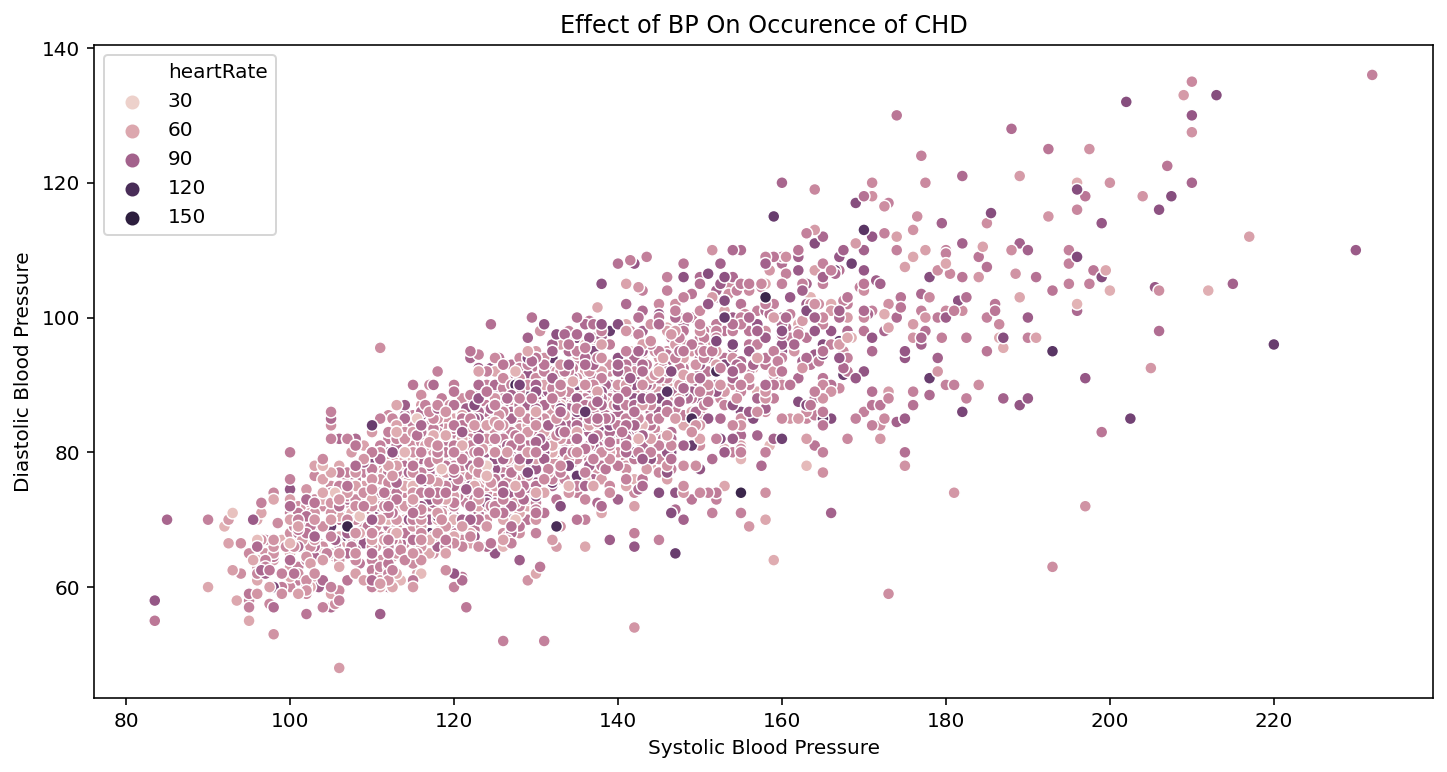

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='sysBP', y='diaBP', hue='heartRate',
               data=df, alpha=1, ax=ax)
plt.title('Effect of BP On Occurence of CHD')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

It can be observed that there is **Somewhat Positive Correlation** between *Heart Rate* and *Systolic & Diastolic Blood Pressure*. It can be observed that increase in Heart Rate can be observed when there is an increase in Blood Pressure.

Text(0.5, 1.0, 'Heart Rate Distribution For TenYearCHD')

Text(0, 0.5, 'Heart Rate')

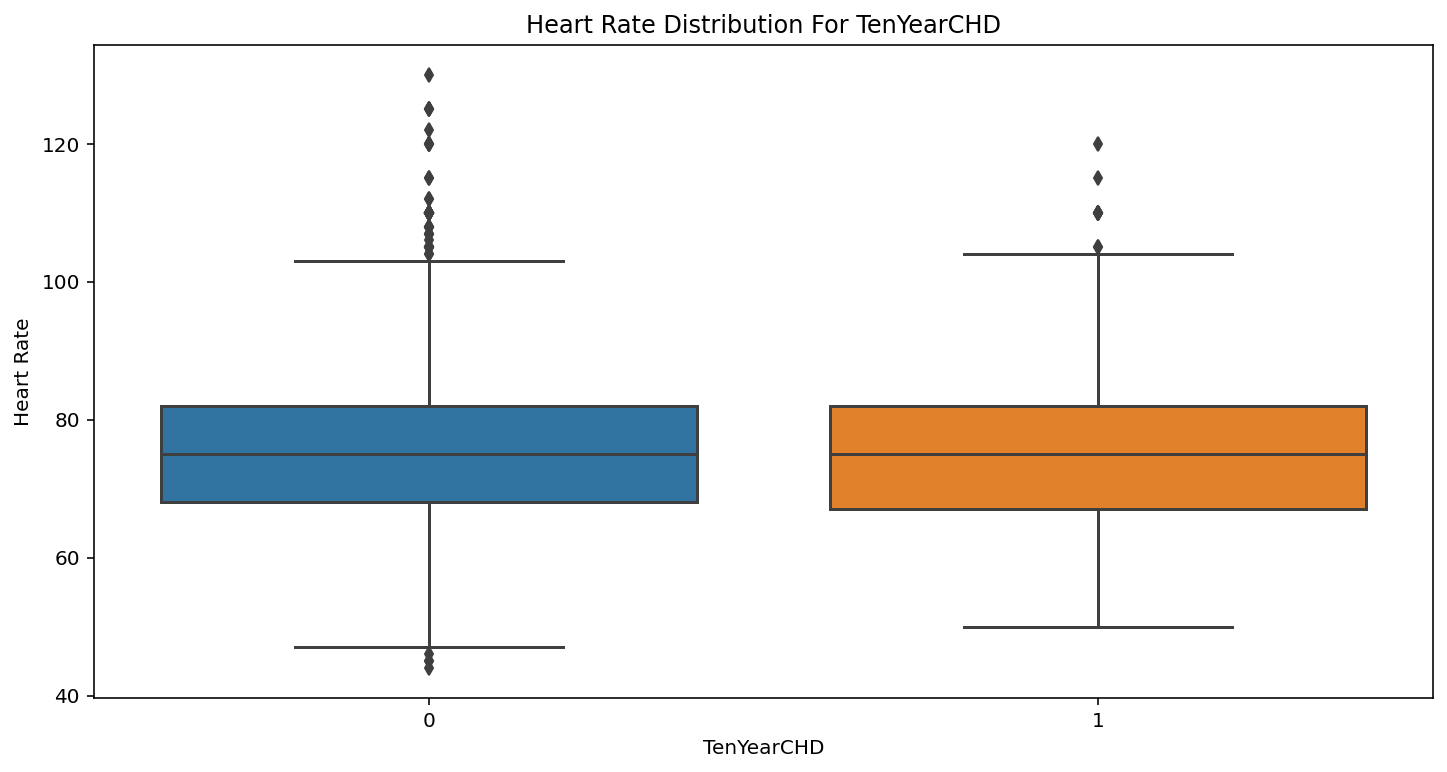

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.boxplot(x='TenYearCHD', y='heartRate', data=df, ax=ax)
plt.title('Heart Rate Distribution For TenYearCHD')
plt.ylabel('Heart Rate')
plt.show()

It can be observed that *Heart Rate* **Has No Effect** on the occurence of *CHD In Ten Years*. 

[Text(0, 0.5, 'Diastolic Blood Pressure')]

Text(0.5, 1.0, 'Effect of Cholestrol on Diastolic Blood Pressure')

[Text(0, 0.5, 'Systolic Blood Pressure')]

Text(0.5, 1.0, 'Effect of Cholestrol on Systolic Blood Pressure')

Text(0.5, 0, 'Total Cholestrol')

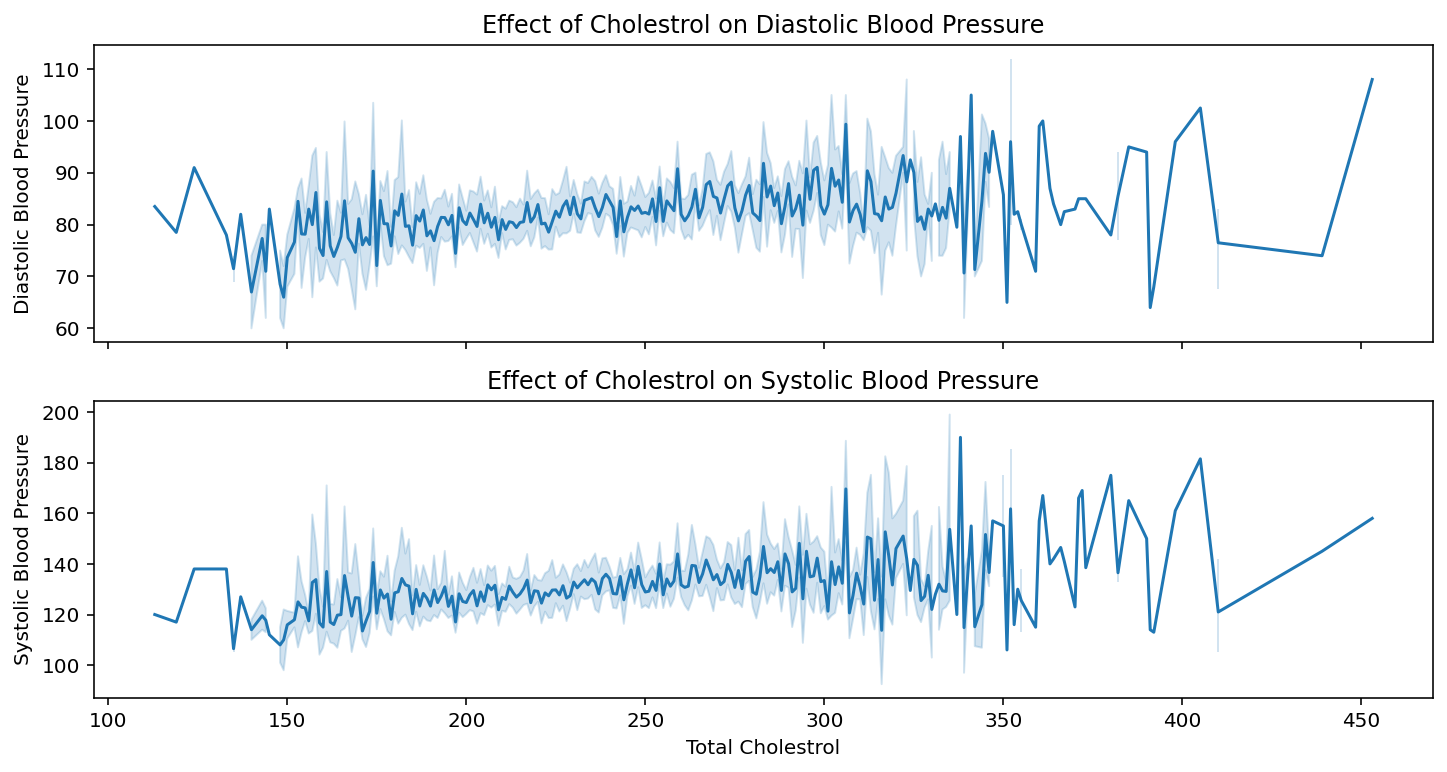

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
fig = plt.Figure()
sns.lineplot(x='totChol', y='diaBP',
               data=df, ax=ax1)
sns.lineplot(x='totChol', y='sysBP',
            data=df, ax=ax2)
ax1.set(ylabel='Diastolic Blood Pressure')
ax1.set_title('Effect of Cholestrol on Diastolic Blood Pressure')
ax2.set(ylabel='Systolic Blood Pressure')
ax2.set_title('Effect of Cholestrol on Systolic Blood Pressure')
plt.xlabel('Total Cholestrol')
plt.show()

It can observed that **Cholestrol Level** has no effect on either **Systolic or Diastolic Blood Pressure**.

Text(0.5, 1.0, 'Cholestrol Level Distribution For TenYearCHD')

Text(0, 0.5, 'Cholestrol Level')

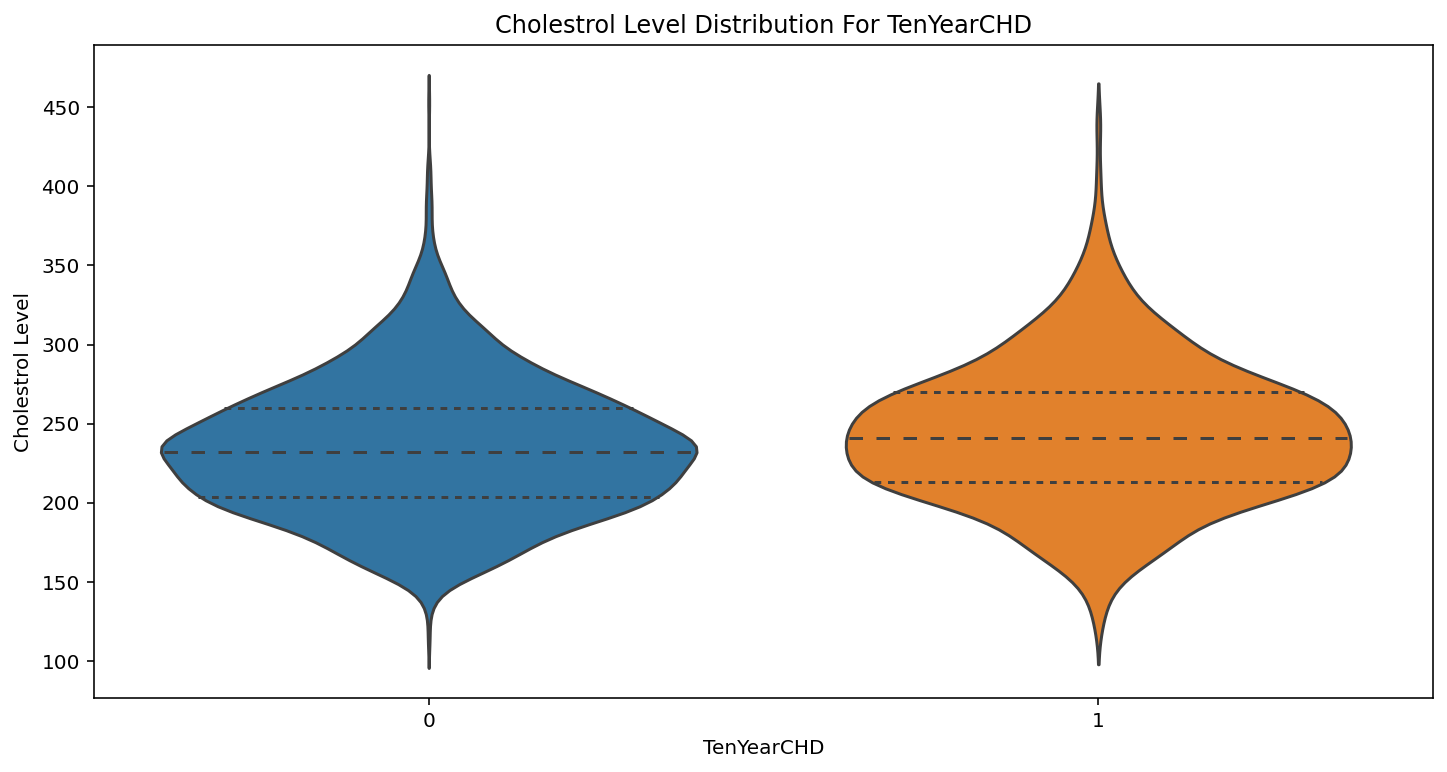

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.violinplot(x='TenYearCHD', y='totChol', data=df, ax=ax, inner='quartile')
plt.title('Cholestrol Level Distribution For TenYearCHD')
plt.ylabel('Cholestrol Level')
plt.show()

It can be observed that, there is **No Relation Between Cholestrol Level and Occurence of CHD**. Patients who have risk of CHD or not, **Most Lie with Cholestrol Levels in Range of 200-260**.

Text(0.5, 1.0, 'Effect of BMI On Blood Pressure')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

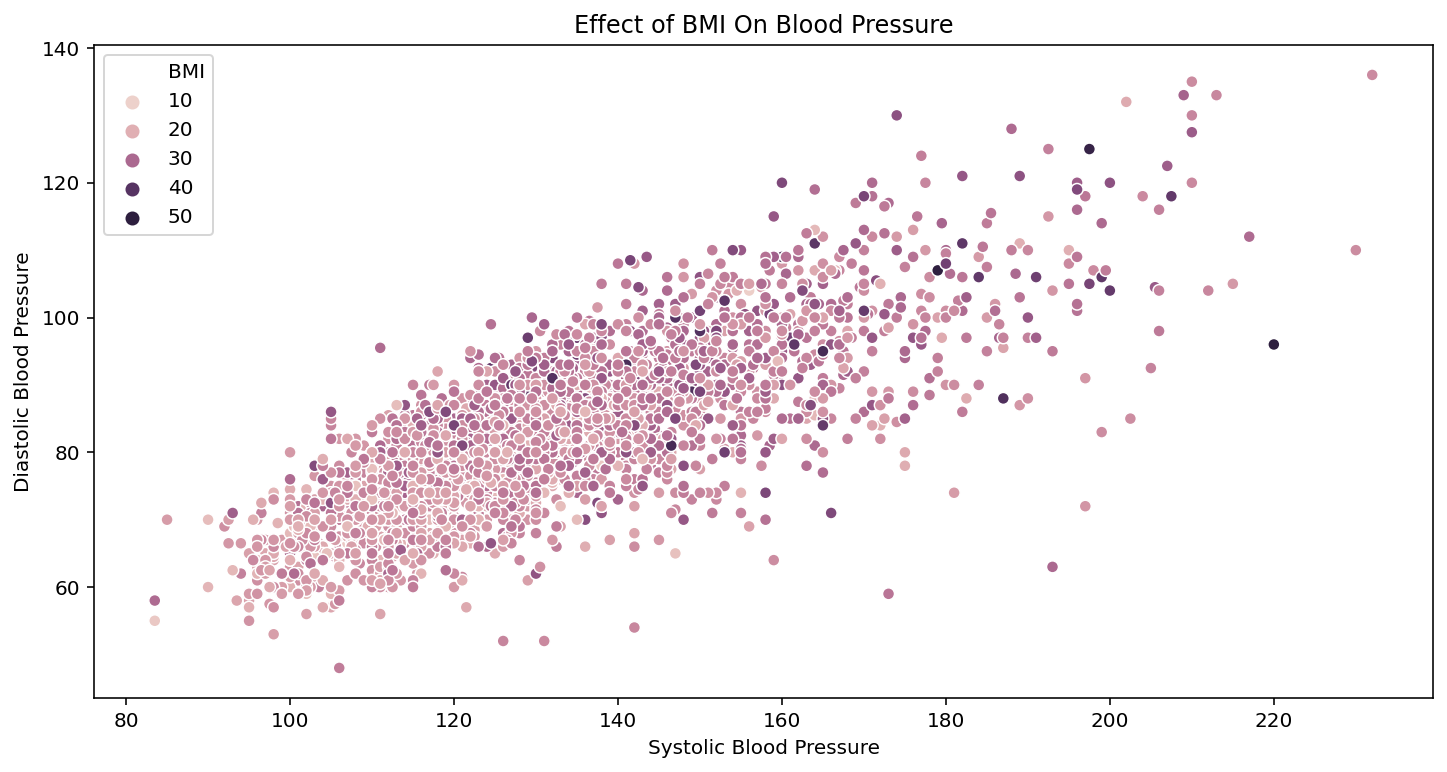

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='sysBP', y='diaBP', hue='BMI',
               data=df, ax=ax)
plt.title('Effect of BMI On Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

**Somewhat Positive Correlation** can be observed between the *BMI and Systolic as well as Diastolic Blood Pressure*. It can be seen that patients with *Higher BMI* tend to be clustered with higher BP, whereas patients with *Lower BMI* tend to be clustered with lower BP.

Text(0.5, 1.0, 'Effect of Active Smoker On Blood Pressure')

Text(0.5, 0, 'Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

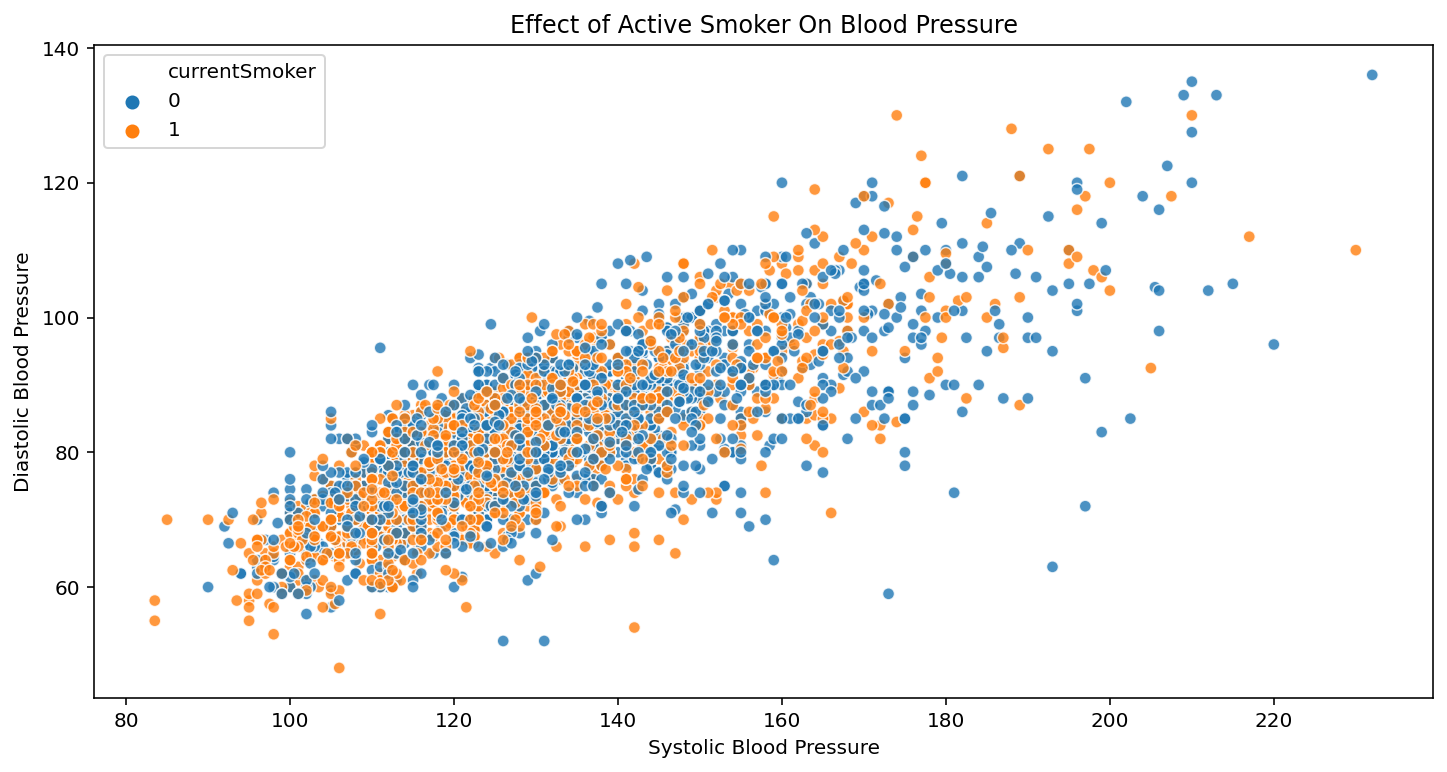

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='sysBP', y='diaBP', hue='currentSmoker',
               data=df, alpha=0.8, ax=ax)
plt.title('Effect of Active Smoker On Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

It can be observed that **Active Smoking** *does not have any effect on the Blood Pressure* either Systolic or Diastolic. There are no clusters for people who are Smokers or Not, and no relation can be established between *Rise in Blood Pressure with Smoking*.

Text(0.5, 1.0, 'TenYearCHD Distribution According to Smoker or Not')

Text(0, 0.5, 'Current Smoker')

Text(0.5, 0, 'Number Of Patients')

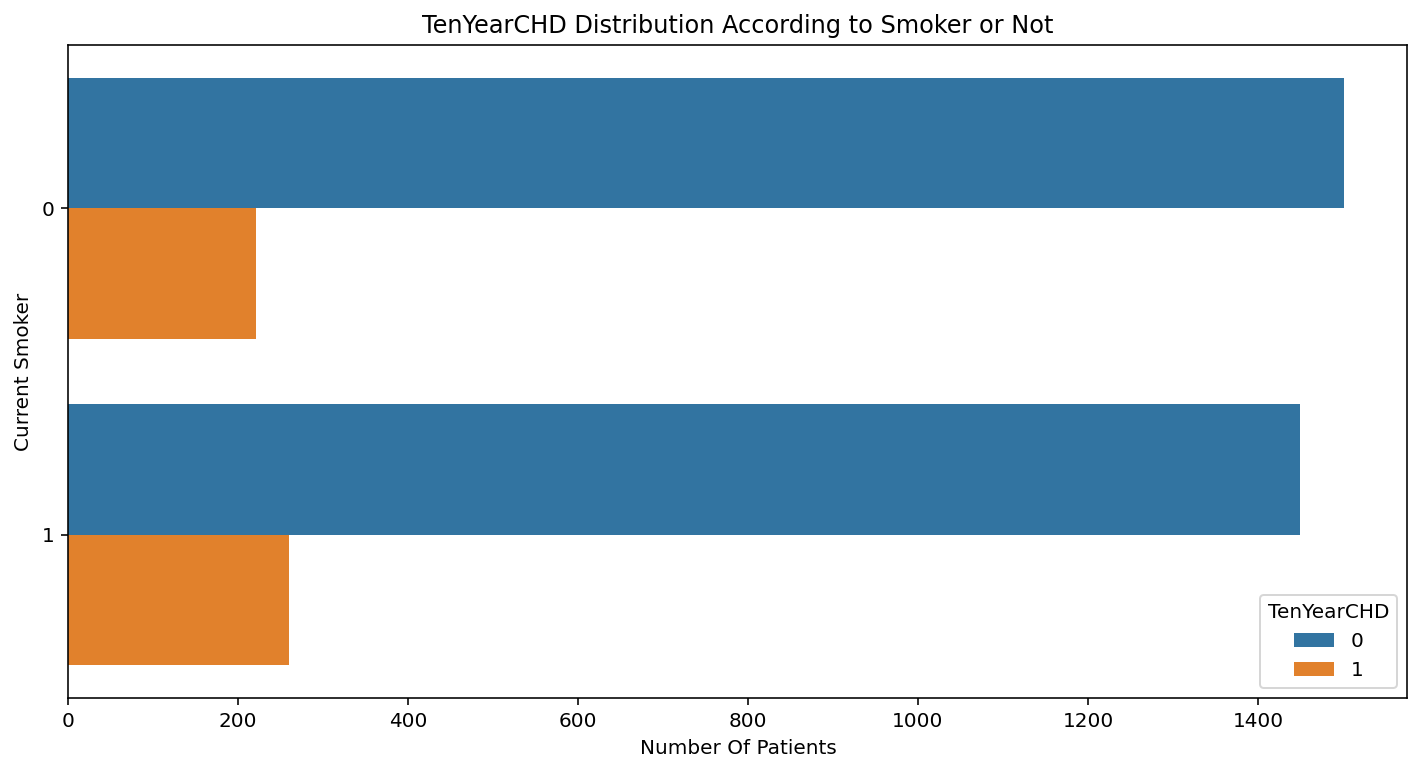

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(hue='TenYearCHD',
             y='currentSmoker',
             data = df, ax=ax)
plt.title('TenYearCHD Distribution According to Smoker or Not')
plt.ylabel('Current Smoker')
plt.xlabel('Number Of Patients')
plt.show()

There is an almost **Equal Distribution** of patients who are *Active & Non-Active Smokers*. However, it can be observed that, **Smoking Has No Effect** on the risk of occurence of CHD in 10 years.

Text(0.5, 1.0, 'Distribution Of Cigarettes Per Day')

Text(0.5, 0, 'Cigarettes Per Day')

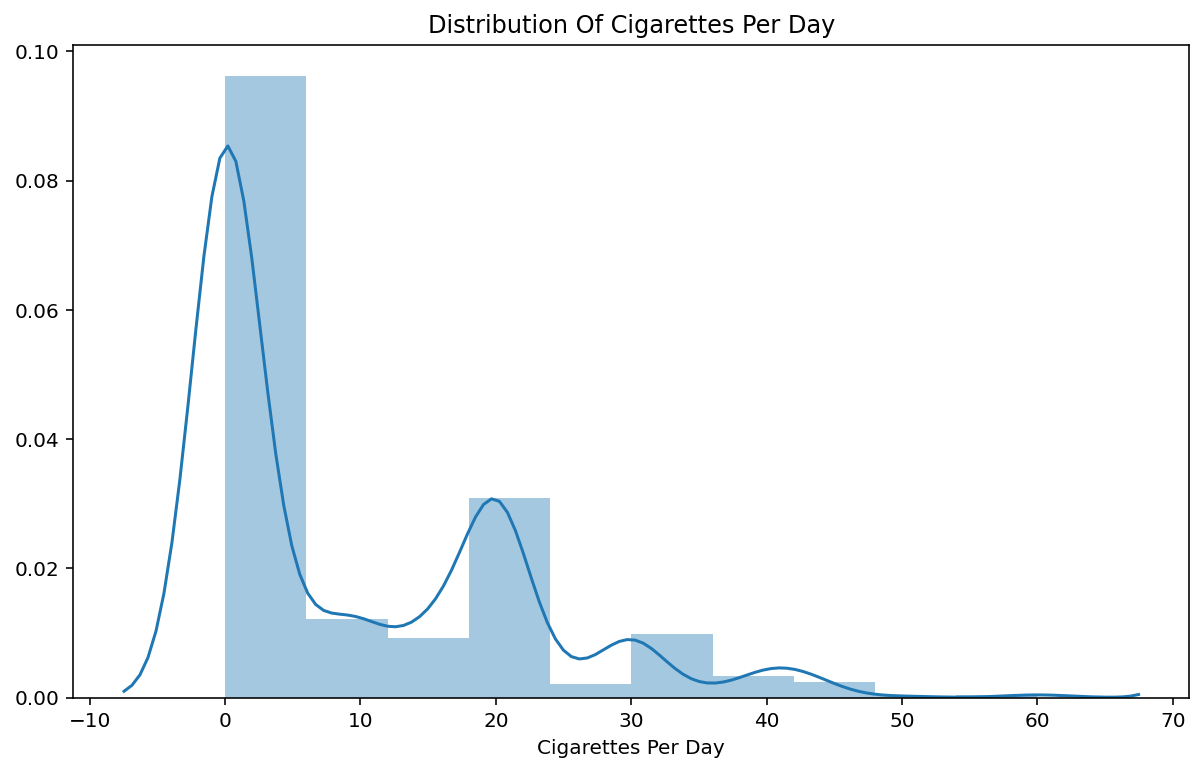

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.distplot(df['cigsPerDay'], hist=True, bins=10, ax=ax)
plt.title('Distribution Of Cigarettes Per Day')
plt.xlabel('Cigarettes Per Day')
plt.show()

It can be observed that, most of the patients **Smoke Zero Cigarettes Per Day**. 

Text(0.5, 1.0, 'Relationship Between Glucose Level and BMI')

Text(0.5, 0, 'Glucose Level')

Text(0, 0.5, 'BMI')

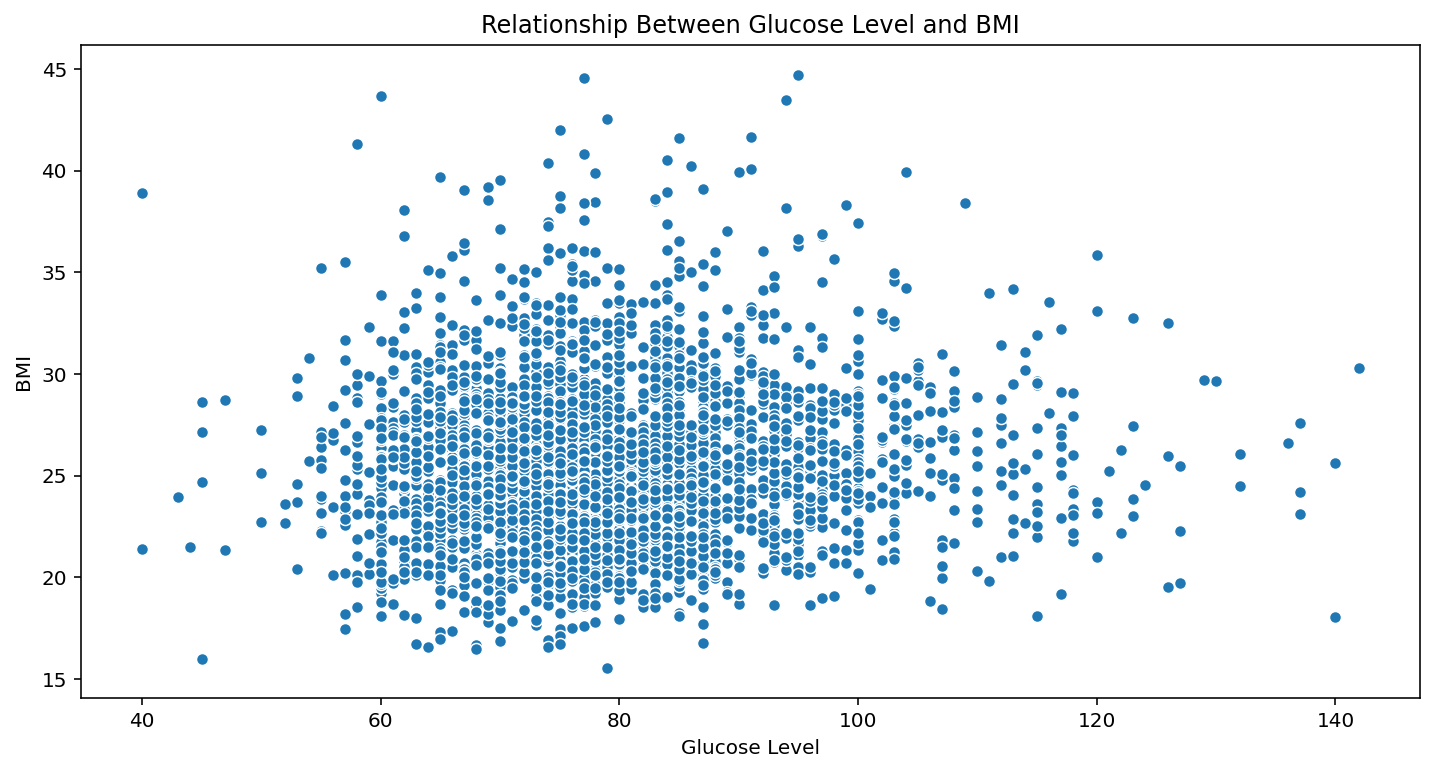

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(x='glucose', y='BMI',
            data=df, ax=ax)
plt.title('Relationship Between Glucose Level and BMI')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.show()

**No Correlation** can be established between *Glucose Level* and *BMI*. No pattern can be observed in the above graph.

Text(0.5, 1.0, 'BMI Distribution For TenYearCHD')

Text(0, 0.5, 'BMI (Body Mass Index)')

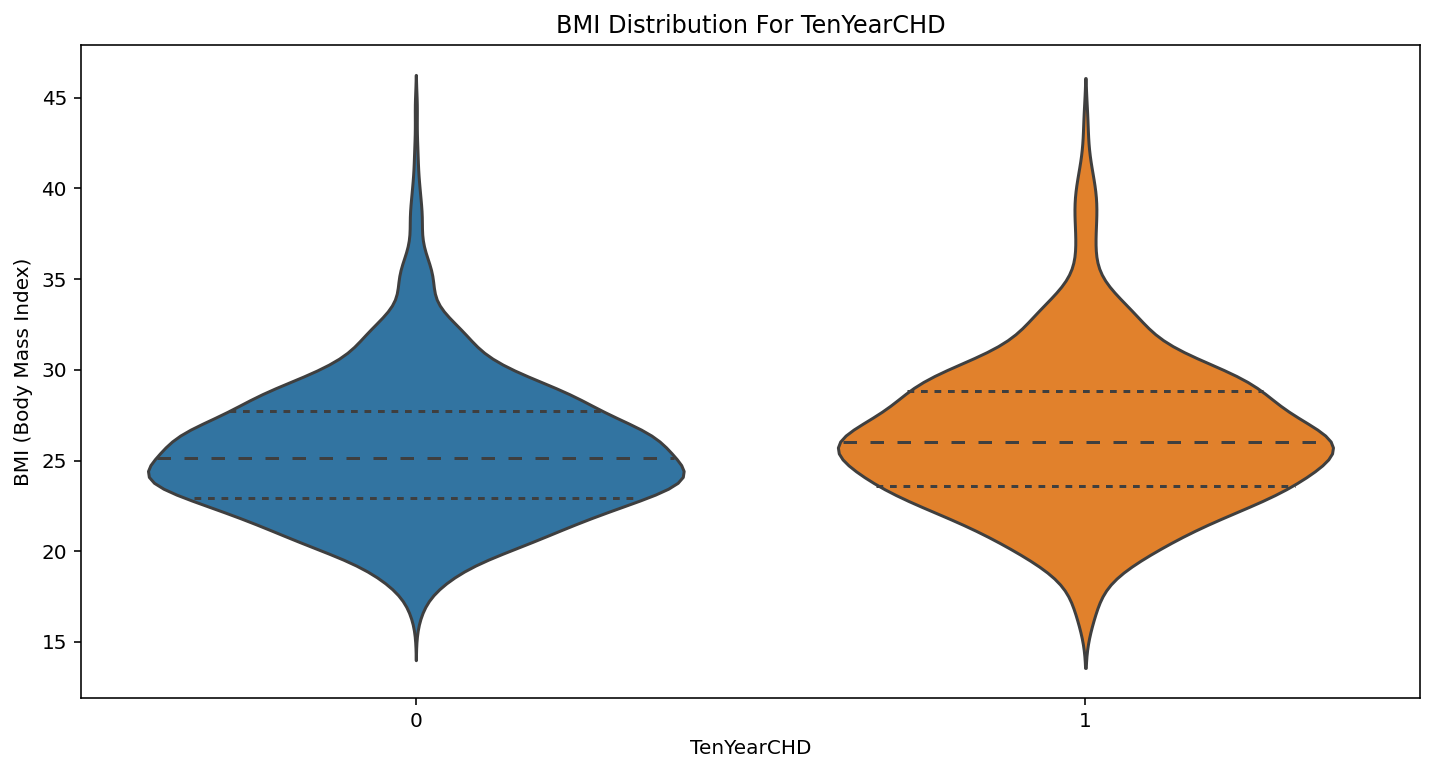

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.violinplot(x='TenYearCHD', y='BMI', data=df, ax=ax, inner='quartile')
plt.title('BMI Distribution For TenYearCHD')
plt.ylabel('BMI (Body Mass Index)')
plt.show()

It can be observed, for both the Patients who have risk of TenYearCHD or not, **Most patients are concentrated with BMI Range 23-28**.

Text(0.5, 1.0, 'Glucose Level Distribution For TenYearCHD')

Text(0, 0.5, 'Glucose Level')

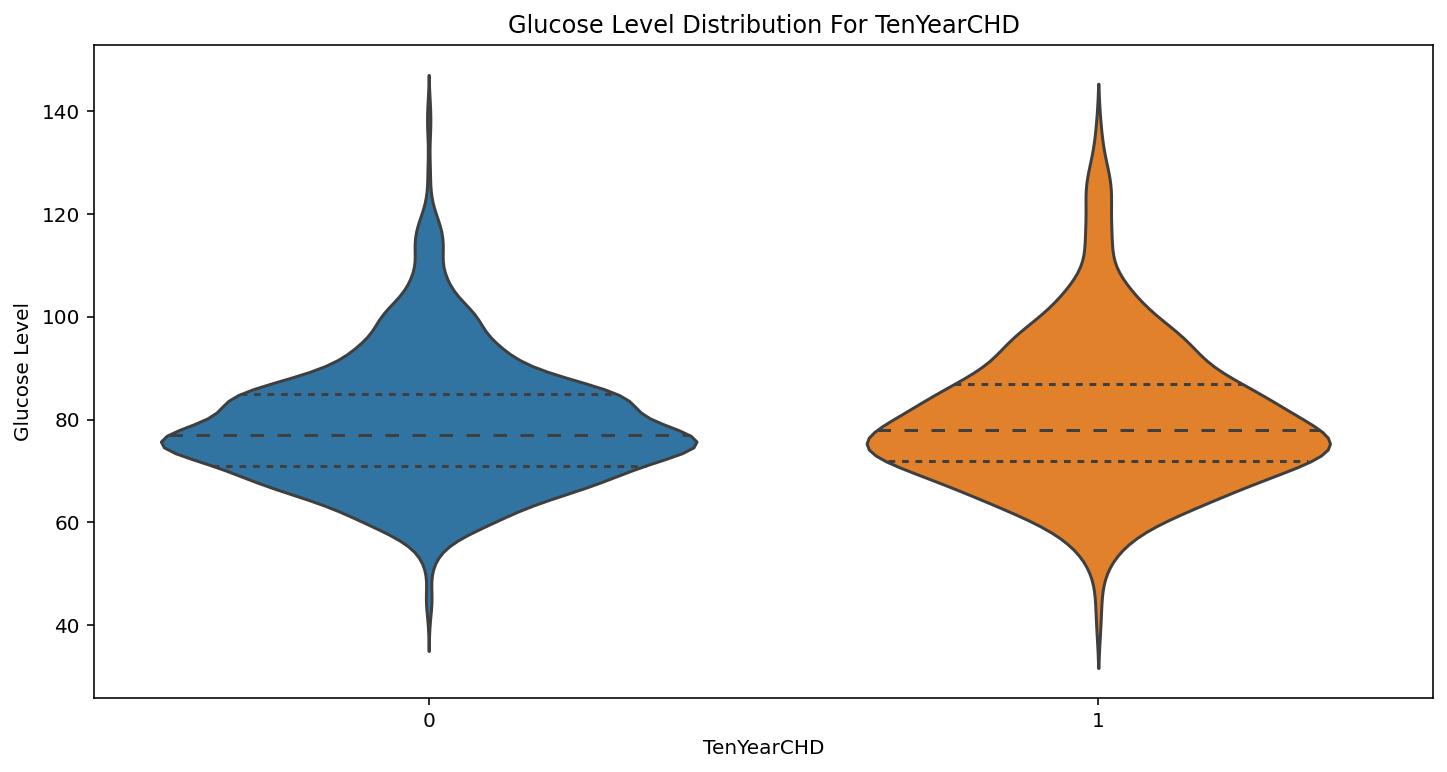

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.violinplot(x='TenYearCHD', y='glucose', data=df, ax=ax, inner='quartile')
plt.title('Glucose Level Distribution For TenYearCHD')
plt.ylabel('Glucose Level')
plt.show()

It can be observed, **Most Patients Have Glucose Levels Between 70-90**, and the Glucose Levels have no effect on risk of Occurence on TenYearCHD.

Text(0.5, 1.0, 'Effect of Hypertension of Occurence of CHD')

Text(0, 0.5, 'Prevalent Hypertension')

Text(0.5, 0, 'Number of Patients')

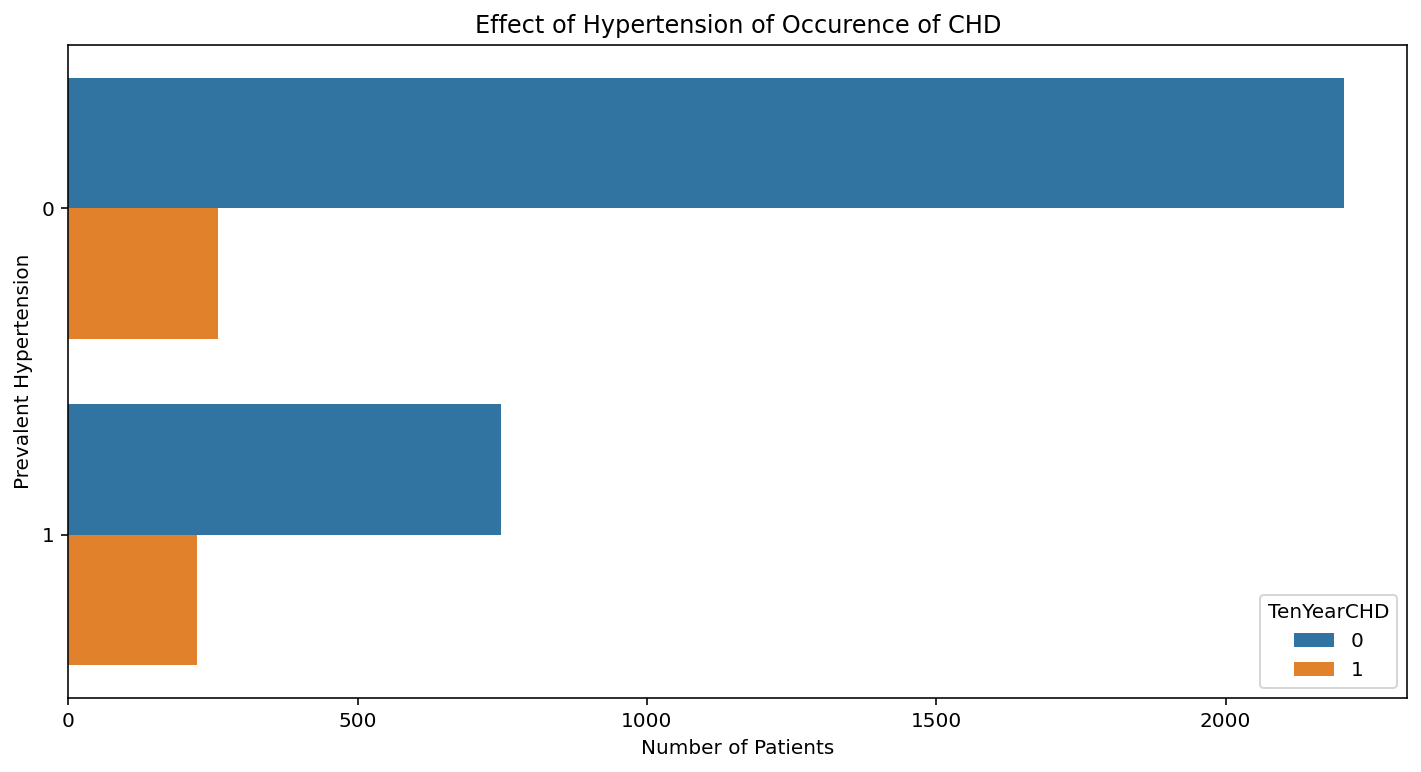

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(hue='TenYearCHD', y='prevalentHyp',
            data=df, ax=ax)
plt.title('Effect of Hypertension of Occurence of CHD')
plt.ylabel('Prevalent Hypertension')
plt.xlabel('Number of Patients')
plt.show()

It can be seen that, patients with **No Prevalent Hypertension** are less likely to have the risk of CHD in Ten Years. Whereas patients with **Prevalent Hypertension** are more likely to have CHD in 10 years.

# Feature Selection

In [ ]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

            Specs       Score
10          sysBP  472.953716
1             age  252.167910
4      cigsPerDay  247.776695
9         totChol  155.024816
11          diaBP  100.091727
7    prevalentHyp   64.830045
0            male   16.968696
12            BMI   10.529660
2       education    5.937976
3   currentSmoker    2.007820
13      heartRate    0.015585


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,472.953716
1,age,252.167910
4,cigsPerDay,247.776695
9,totChol,155.024816
11,diaBP,100.091727
7,prevalentHyp,64.830045
0,male,16.968696
12,BMI,10.529660
2,education,5.937976
3,currentSmoker,2.007820


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

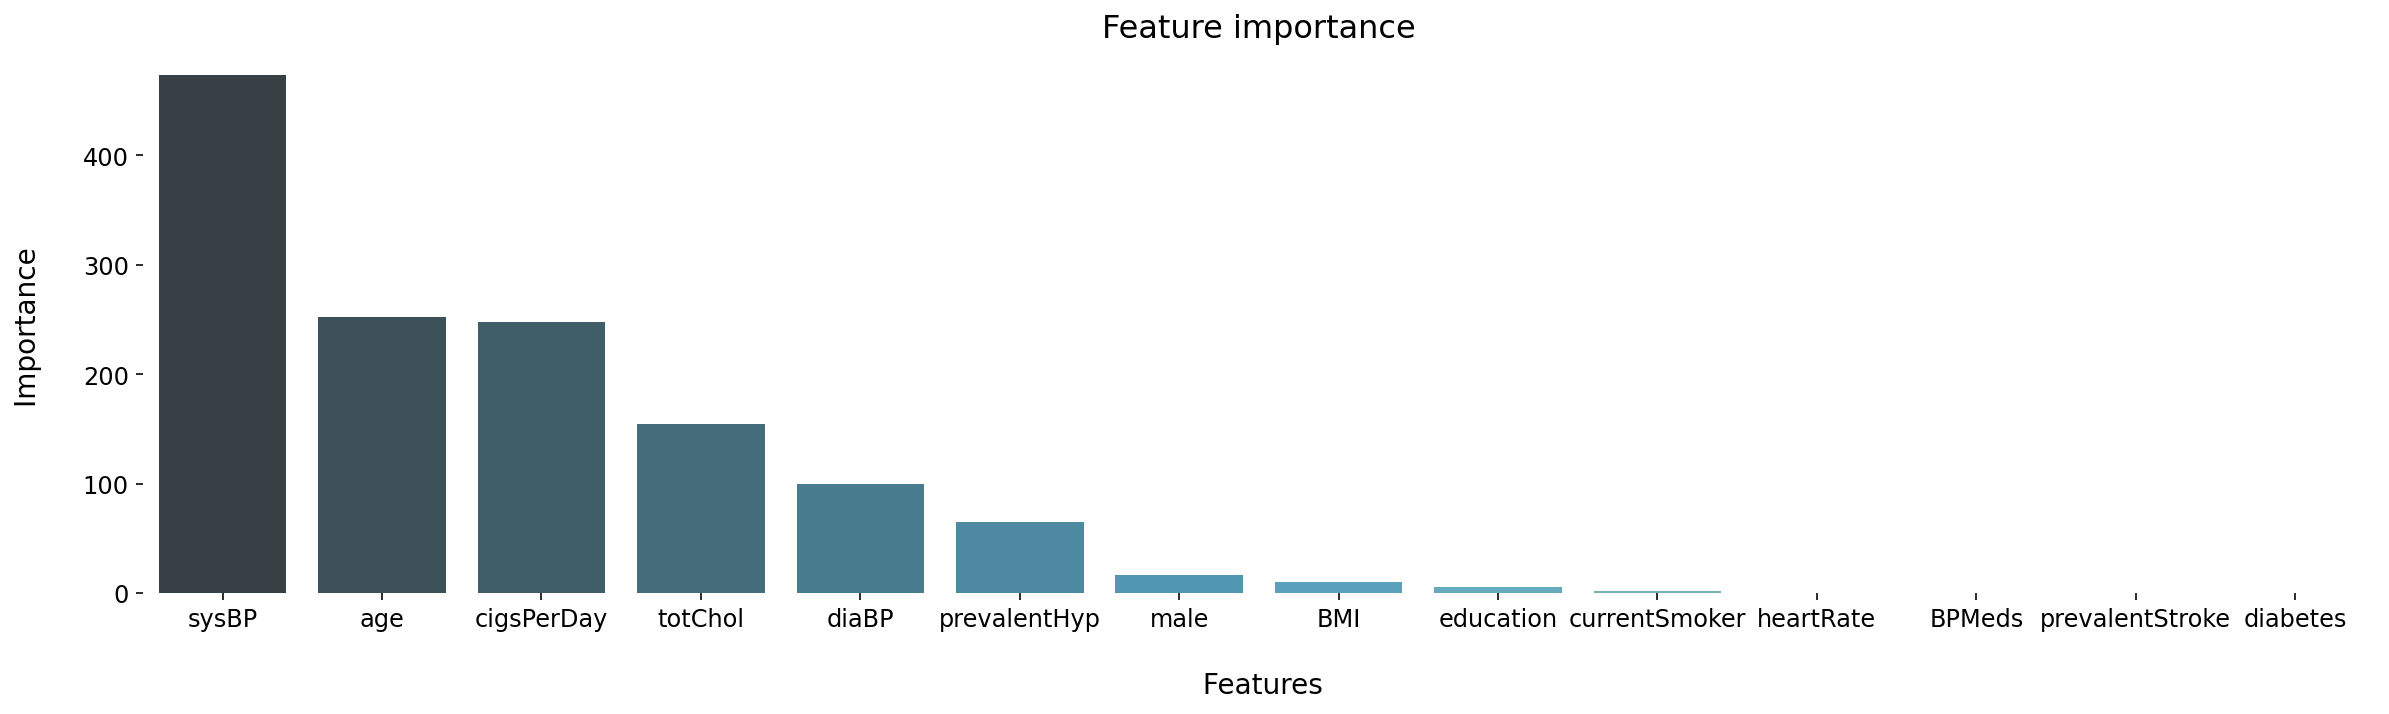

In [ ]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BMI',
 'education',
 'currentSmoker']

In [ ]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


<Figure size 1080x576 with 0 Axes>

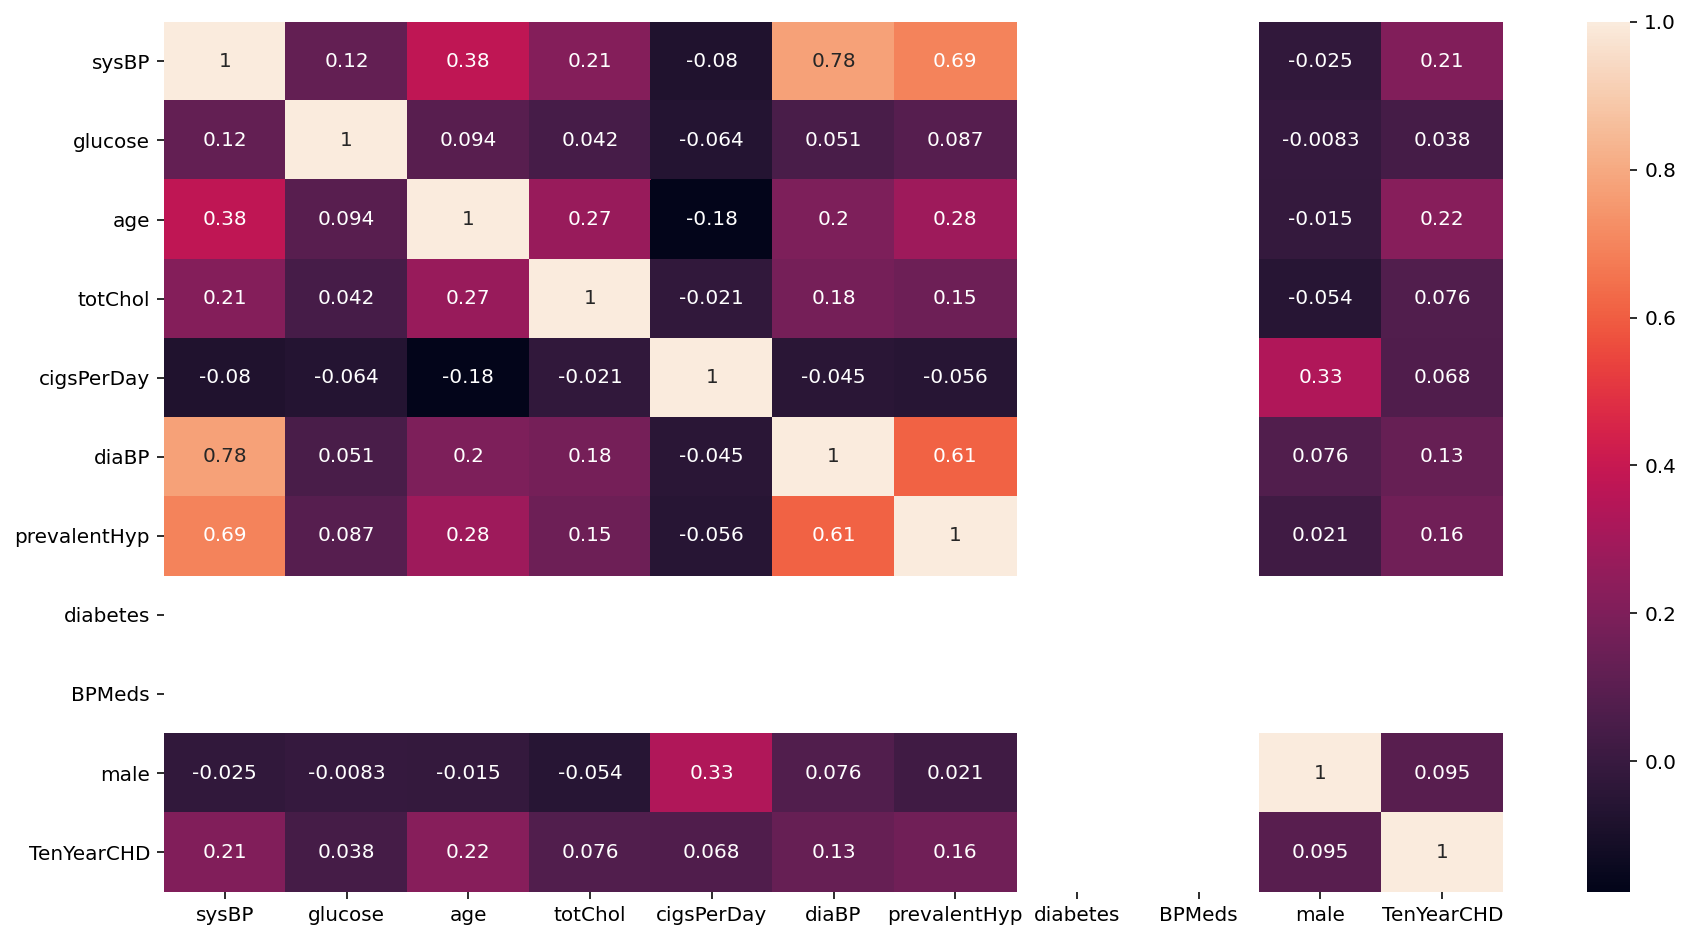

In [ ]:
# Checking correlation again
plt.figure(figsize=(15,8))
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)

In [ ]:
# Checking for outliers
df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.0,3432.0,3432.000000,3432.000000
mean,130.885927,79.348193,49.173368,235.781469,9.207168,82.334353,0.282634,0.0,0.0,0.446970,0.140152
std,20.607716,12.747588,8.480228,43.139097,11.974832,11.527559,0.450346,0.0,0.0,0.497252,0.347195
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,116.000000,71.000000,42.000000,205.000000,0.000000,74.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,127.500000,77.000000,48.000000,233.000000,0.000000,81.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,142.000000,86.000000,56.000000,262.000000,20.000000,89.000000,1.000000,0.0,0.0,1.000000,0.000000
max,232.000000,142.000000,69.000000,453.000000,60.000000,136.000000,1.000000,0.0,0.0,1.000000,1.000000


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD


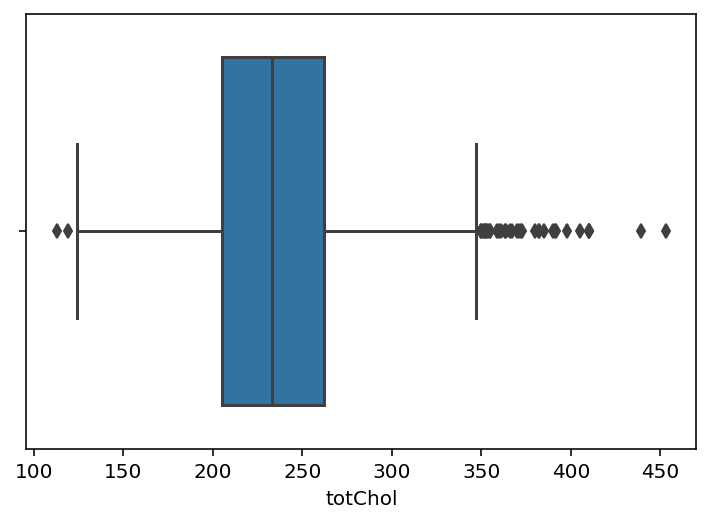

In [ ]:
# Zooming into cholesterin outliers
sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

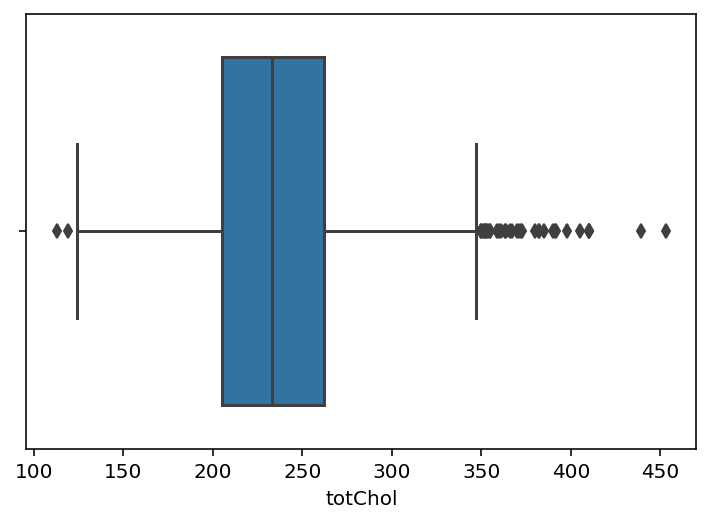

In [ ]:
# Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

In [ ]:
df_clean = df

## Feature Scaling <a name="paragraph2"></a>
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)


In [ ]:
df_scaled.describe()
df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.0,3432.0,3432.000000,3432.000000
mean,0.319097,0.385767,0.464145,0.361122,0.153453,0.390163,0.282634,0.0,0.0,0.446970,0.140152
std,0.138772,0.124976,0.229195,0.126880,0.199581,0.130995,0.450346,0.0,0.0,0.497252,0.347195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.218855,0.303922,0.270270,0.270588,0.000000,0.295455,0.000000,0.0,0.0,0.000000,0.000000
50%,0.296296,0.362745,0.432432,0.352941,0.000000,0.375000,0.000000,0.0,0.0,0.000000,0.000000
75%,0.393939,0.450980,0.648649,0.438235,0.333333,0.465909,1.000000,0.0,0.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.0,3432.0,3432.000000,3432.000000
mean,130.885927,79.348193,49.173368,235.781469,9.207168,82.334353,0.282634,0.0,0.0,0.446970,0.140152
std,20.607716,12.747588,8.480228,43.139097,11.974832,11.527559,0.450346,0.0,0.0,0.497252,0.347195
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,116.000000,71.000000,42.000000,205.000000,0.000000,74.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,127.500000,77.000000,48.000000,233.000000,0.000000,81.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,142.000000,86.000000,56.000000,262.000000,20.000000,89.000000,1.000000,0.0,0.0,1.000000,0.000000
max,232.000000,142.000000,69.000000,453.000000,60.000000,136.000000,1.000000,0.0,0.0,1.000000,1.000000


## Test - Train Split <a name="paragraph3"></a>

In [ ]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)

In [ ]:
len(X_train)
len(X_test)

2059

1373

## Resampling imbalanced Dataset <a name="paragraph4"></a>

In [ ]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

NameError: ignored

We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

### UNDERSAMPLING METHOD

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


0.0    611
1.0    481
Name: TenYearCHD, dtype: int64

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

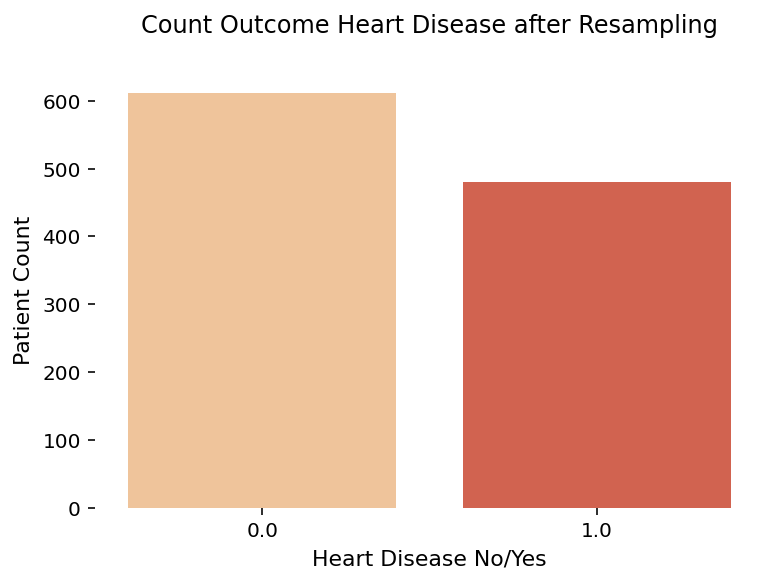

In [ ]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

> ## **Model Pipeline** <a name="paragraph5"></a>

In [ ]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

The accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 72.91%


Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

The accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 75.38%


Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

The accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 72.61%


Pipeline(memory=None,
         steps=[('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

The accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform') is: 82.01%


## Modelling & Evaluation (without Pipeline) <a name="paragraph6"></a>

### 1. Logistic Regression

In [ ]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 72.89999999999999%
The f1 score for LogReg is: 39.800000000000004%
The precision score for LogReg is: 29.9%
The recall score for LogReg is: 59.4%


### 2. SVM

In [ ]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The accuracy score for SVM is: 75.4%
The f1 score for SVM is: 40.300000000000004%
The precision score for SVM is: 31.8%
The recall score for SVM is: 55.1%


### 3. Decision Tree

In [ ]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The accuracy score for DTC is: 73.2%
The f1 score for DTC is: 52.900000000000006%
The precision score for DTC is: 36.0%
The recall score for DTC is: 100.0%


## 4.Ramdom Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=11).fit(X_train,y_train)

In [ ]:
normalized_rf_pred = rf.predict(X_test)

In [ ]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_rf_pred)
print(f"The accuracy score for RFC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_rf_pred)
print(f"The f1 score for RFC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_rf_pred)
print(f"The precision score for RFC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_rf_pred)
print(f"The recall score for RFC is: {round(recall,3)*100}%")

The accuracy score for RFC is: 80.30000000000001%
The f1 score for RFC is: 59.8%
The precision score for RFC is: 43.2%
The recall score for RFC is: 97.1%


## 5. KNN

In [ ]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

The accuracy score for KNN is: 82.0%
The f1 score for KNN is: 45.0%
The precision score for KNN is: 41.699999999999996%
The recall score for KNN is: 48.8%


### Result: The KNN model has the highest accuracy score

In [ ]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")



The accuracy score of the test data is:  82.01019664967225 %
The accuracy score of the training data is:  77.38 %


**The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.**

In [ ]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

'Cross Validation is used to assess the predictive performance of the models and and to judge \nhow they perform outside the sample to a new data set'

Cross-validated scores: [0.85007278 0.83988355 0.8483965  0.85860058 0.84402332]
The Accuracy of Model with Cross Validation is: 84.82%


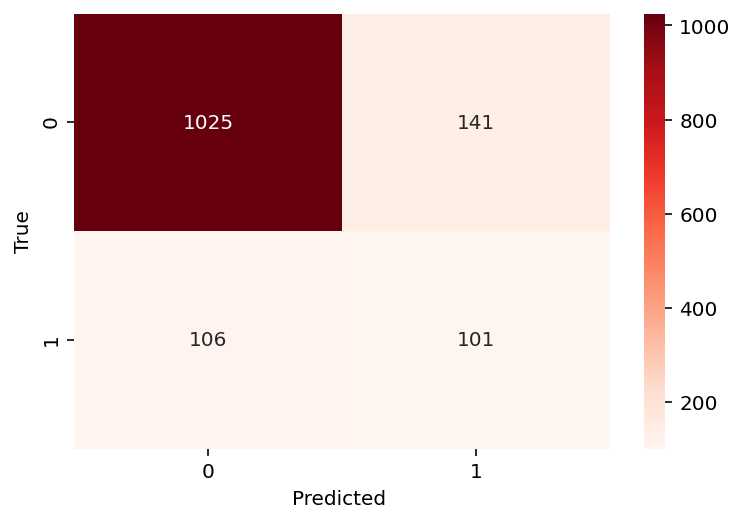

In [ ]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


"the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate \nand calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to \ndistinguish between the two outcome classes."

Text(0.5, 1.0, 'ROC CURVE KNN')

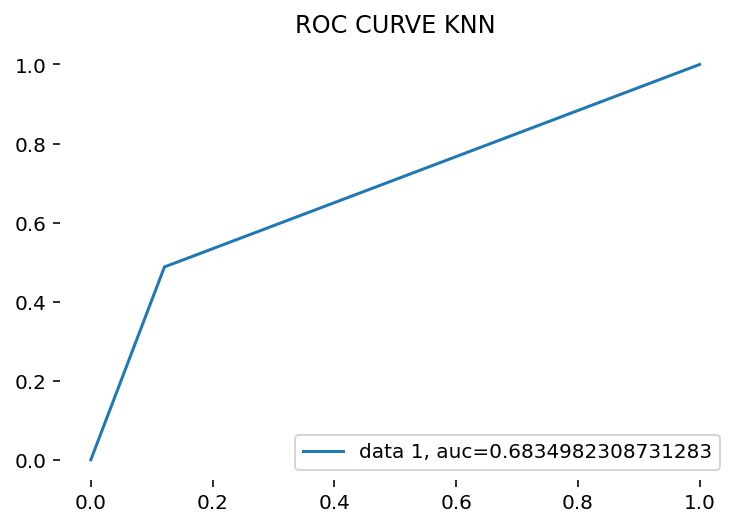

The score for the AUC ROC Curve is: 68.30000000000001%


In [ ]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")